In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load data and create a dataframe
column_names = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|', names=column_names,encoding='latin-1')

In [3]:
# View dataset
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Look for null values and check datatypes
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1682 non-null int64
movie title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [5]:
# drop unnecessary columns
movies = movies.drop(columns=['movie id', 'video release date', 'IMDb URL', 'release date'])

In [6]:
# Look for duplicates
duplicates = movies.duplicated()
duplicates.value_counts()

False    1664
True       18
dtype: int64

In [7]:
# Drop duplicate rows
movies.drop_duplicates(inplace=True)

In [8]:
# Rename Children's column
movies.rename(columns={"Children's":"Childrens"}, inplace=True)

In [9]:
# check for odd values (anything other than 0 or 1)
print('unknown')
print(movies['unknown'].value_counts())
print('Action')
print(movies['Action'].value_counts())
print('Adventure')
print(movies['Adventure'].value_counts())
print('Animation')
print(movies['Animation'].value_counts())
print('Children\'s')
print(movies['Childrens'].value_counts())
print('Comedy')
print(movies['Comedy'].value_counts())
print('Documentary')
print(movies['Documentary'].value_counts())
print('Drama')
print(movies['Drama'].value_counts())
print('Fantasy')
print(movies['Fantasy'].value_counts())
print('Film-Noir')
print(movies['Film-Noir'].value_counts())
print('Horror')
print(movies['Horror'].value_counts())
print('Musical')
print(movies['Musical'].value_counts())
print('Mystery')
print(movies['Mystery'].value_counts())
print('Romance')
print(movies['Romance'].value_counts())
print('Sci-Fi')
print(movies['Sci-Fi'].value_counts())
print('Thriller')
print(movies['Thriller'].value_counts())
print('War')
print(movies['War'].value_counts())
print('Western')
print(movies['Western'].value_counts())

unknown
0    1662
1       2
Name: unknown, dtype: int64
Action
0    1415
1     249
Name: Action, dtype: int64
Adventure
0    1531
1     133
Name: Adventure, dtype: int64
Animation
0    1622
1      42
Name: Animation, dtype: int64
Children's
0    1544
1     120
Name: Childrens, dtype: int64
Comedy
0    1162
1     502
Name: Comedy, dtype: int64
Documentary
0    1614
1      50
Name: Documentary, dtype: int64
Drama
0    948
1    716
Name: Drama, dtype: int64
Fantasy
0    1642
1      22
Name: Fantasy, dtype: int64
Film-Noir
0    1640
1      24
Name: Film-Noir, dtype: int64
Horror
0    1574
1      90
Name: Horror, dtype: int64
Musical
0    1608
1      56
Name: Musical, dtype: int64
Mystery
0    1604
1      60
Name: Mystery, dtype: int64
Romance
0    1420
1     244
Name: Romance, dtype: int64
Sci-Fi
0    1564
1     100
Name: Sci-Fi, dtype: int64
Thriller
0    1416
1     248
Name: Thriller, dtype: int64
War
0    1593
1      71
Name: War, dtype: int64
Western
0    1637
1      27
Name: Western, 

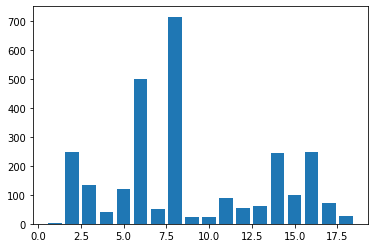

In [10]:
# Total number of movies in each genre
genre_tot = np.array([2,249,133,42,120,502,50,716,22,24,90,56,60,244,100,248,71,27])
plt.bar(range(1,19),genre_tot)
plt.show()

In [11]:
# How many movies were assigned to both comedy and drama?
comedy = movies[movies['Comedy']==1]
both = comedy[comedy['Drama']==1]
both

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,Babe (1995),0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
33,"Doom Generation, The (1995)",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
44,Eat Drink Man Woman (1994),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
46,Ed Wood (1994),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,Nobody Loves Me (Keiner liebt mich) (1994),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1626,"Wife, The (1995)",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1630,"Slingshot, The (1993)",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1632,Á köldum klaka (Cold Fever) (1994),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
# Choose k based on inertia
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(movies.drop(columns=['movie title']))
    distortions.append(km.inertia_)

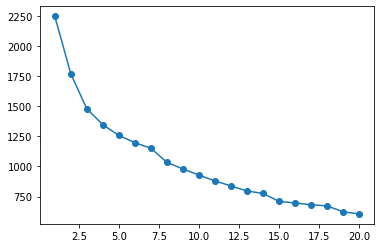

In [13]:
# Plot the distortions and choose k based on slope of the line
plt.plot(range(1,21), distortions, marker ='o')

The plot levels out most at k = 3, 8, & 15

# Fit model with k = 3

In [14]:
# Fit model with k = 3
kmeans3 = KMeans(n_clusters=3, random_state=0)
kmeans3.fit(movies.drop(columns=['movie title']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [15]:
# Check the cluster centers
print(kmeans3.cluster_centers_)

[[ 3.71747212e-03  3.30855019e-01  1.93308550e-01  5.94795539e-02
   1.17100372e-01  5.57620818e-03  9.10780669e-02  8.55018587e-02
   2.77555756e-15  2.04460967e-02  4.08921933e-02  1.35687732e-01
   4.83271375e-02  6.69144981e-02  1.13382900e-01  1.46840149e-01
   3.28996283e-01  4.08921933e-02  2.78810409e-02]
 [-5.42101086e-18  5.61122244e-02  3.20641283e-02  2.00400802e-02
   8.01603206e-02  1.00000000e+00  3.00601202e-02  2.00400802e-03
   1.78356713e-01  1.40280561e-02  8.50014503e-17  2.40480962e-02
   4.20841683e-02  2.00400802e-02  1.94388778e-01  2.40480962e-02
   2.40480962e-02  2.60521042e-02  1.40280561e-02]
 [-1.47451495e-17  6.85805423e-02  2.07336523e-02 -2.98372438e-16
   2.71132376e-02  3.60822483e-15  6.85805423e-02  4.78468900e-03
   1.00000000e+00  6.37958533e-03  3.18979266e-03  7.97448166e-03
   1.43540670e-02  2.23285486e-02  1.37161085e-01  1.43540670e-02
   9.40988836e-02  5.74162679e-02  7.97448166e-03]]


In [16]:
# Check the labels
print(kmeans3.labels_)

[1 0 0 ... 0 1 2]


In [17]:
# How many iterations were needed to form the clusters?
kmeans3.n_iter_

3

# Fit model with k = 8

In [18]:
# Fit model with k = 8
kmeans8 = KMeans(n_clusters=8, random_state=0)
kmeans8.fit(movies.drop(columns=['movie title']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
# Check the labels
print(kmeans8.labels_)

[4 0 3 ... 3 2 1]


In [20]:
# How many iterations were needed to form the clusters?
kmeans8.n_iter_

7

# Fit model with k = 15

In [21]:
# Fit model with k = 15
kmeans15 = KMeans(n_clusters=15, random_state=0)
kmeans15.fit(movies.drop(columns=['movie title']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [22]:
# Check the labels
print(kmeans15.labels_)

[7 2 3 ... 3 4 0]


In [23]:
# How many iterations were needed to form the clusters?
kmeans15.n_iter_

5

# Analysis, k=15

In [24]:
# Add a label column to the dataframe
movies['label']=kmeans15.labels_

In [25]:
class1 = movies[movies['label']==0]
class2 = movies[movies['label']==1]
class3 = movies[movies['label']==2]
class4 = movies[movies['label']==3]
class5 = movies[movies['label']==4]
class6 = movies[movies['label']==5]
class7 = movies[movies['label']==6]
class8 = movies[movies['label']==7]
class9 = movies[movies['label']==8]
class10 = movies[movies['label']==9]
class11 = movies[movies['label']==10]
class12 = movies[movies['label']==11]
class13 = movies[movies['label']==12]
class14 = movies[movies['label']==13]
class15 = movies[movies['label']==14]

In [26]:
totals = []

In [27]:
# Calculate the total number of movies in each class
class_total = []
for i in range(1,20):
    class_total.append(class1.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class2.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class3.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class4.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class5.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class6.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class7.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class8.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class9.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class10.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class11.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class12.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class13.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class14.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class15.iloc[:,i].sum())
totals.append(class_total)

In [28]:
# Form a dataframe out of totals
totals_df = pd.DataFrame(totals, columns=['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

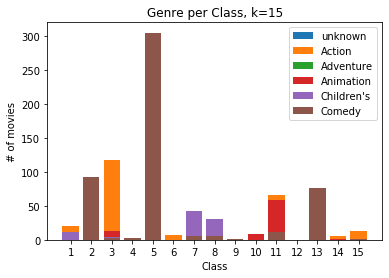

In [29]:
# Plot the number of movies in each class, color by genre
plt.bar(range(1,16), totals_df['unknown'])
plt.bar(range(1,16), totals_df['Action'])
plt.bar(range(1,16), totals_df['Animation'])
plt.bar(range(1,16), totals_df['Adventure'])
plt.bar(range(1,16), totals_df['Children\'s'])
plt.bar(range(1,16), totals_df['Comedy'])

plt.xticks(range(1,16))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=15')
plt.legend(['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy'])

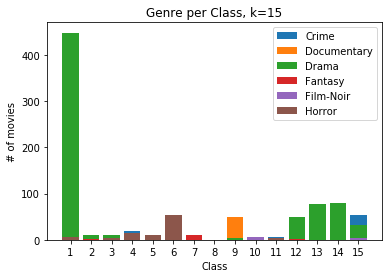

In [30]:
plt.bar(range(1,16), totals_df['Crime'])
plt.bar(range(1,16), totals_df['Documentary'])
plt.bar(range(1,16), totals_df['Drama'])
plt.bar(range(1,16), totals_df['Fantasy'])
plt.bar(range(1,16), totals_df['Film-Noir'])
plt.bar(range(1,16), totals_df['Horror'])

plt.xticks(range(1,16))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=15')
plt.legend(['Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror'])

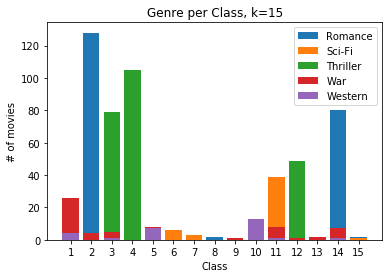

In [31]:
plt.bar(range(1,16), totals_df['Romance'])
plt.bar(range(1,16), totals_df['Sci-Fi'])
plt.bar(range(1,16), totals_df['Thriller'])
plt.bar(range(1,16), totals_df['War'])
plt.bar(range(1,16), totals_df['Western'])

plt.xticks(range(1,16))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=15')
plt.legend(['Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

# Analysis, k=8

In [32]:
# Add a label column to the dataframe
movies['label']=kmeans8.labels_

In [33]:
class1 = movies[movies['label']==0]
class2 = movies[movies['label']==1]
class3 = movies[movies['label']==2]
class4 = movies[movies['label']==3]
class5 = movies[movies['label']==4]
class6 = movies[movies['label']==5]
class7 = movies[movies['label']==6]
class8 = movies[movies['label']==7]

In [34]:
totals = []

In [35]:
# Calculate the total number of movies in each class
class_total = []
for i in range(1,20):
    class_total.append(class1.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class2.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class3.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class4.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class5.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class6.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class7.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class8.iloc[:,i].sum())
totals.append(class_total)

In [36]:
# Form a dataframe out of totals
totals_df = pd.DataFrame(totals, columns=['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

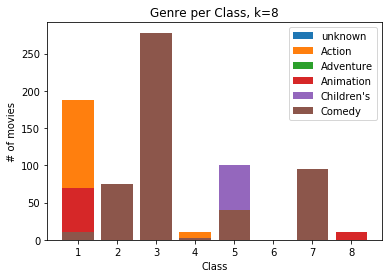

In [37]:
# Plot the number of movies in each class, color by genre
plt.bar(range(1,9), totals_df['unknown'])
plt.bar(range(1,9), totals_df['Action'])
plt.bar(range(1,9), totals_df['Animation'])
plt.bar(range(1,9), totals_df['Adventure'])
plt.bar(range(1,9), totals_df['Children\'s'])
plt.bar(range(1,9), totals_df['Comedy'])

plt.xticks(range(1,9))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=8')
plt.legend(['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy'])

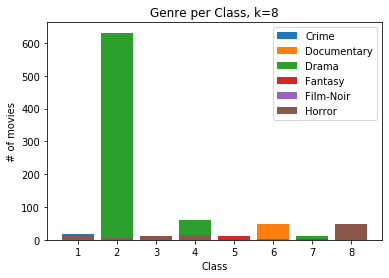

In [38]:
plt.bar(range(1,9), totals_df['Crime'])
plt.bar(range(1,9), totals_df['Documentary'])
plt.bar(range(1,9), totals_df['Drama'])
plt.bar(range(1,9), totals_df['Fantasy'])
plt.bar(range(1,9), totals_df['Film-Noir'])
plt.bar(range(1,9), totals_df['Horror'])

plt.xticks(range(1,9))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=8')
plt.legend(['Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror'])

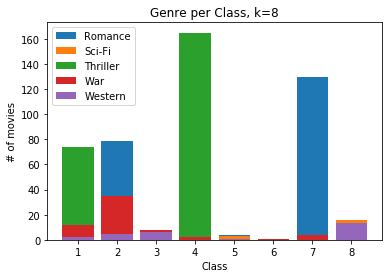

In [39]:
plt.bar(range(1,9), totals_df['Romance'])
plt.bar(range(1,9), totals_df['Sci-Fi'])
plt.bar(range(1,9), totals_df['Thriller'])
plt.bar(range(1,9), totals_df['War'])
plt.bar(range(1,9), totals_df['Western'])

plt.xticks(range(1,9))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=8')
plt.legend(['Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

# Analysis, k = 3

In [40]:
# Add a label column to the dataframe
movies['label']=kmeans3.labels_

In [41]:
class1 = movies[movies['label']==0]
class2 = movies[movies['label']==1]
class3 = movies[movies['label']==2]

In [42]:
totals = []

In [43]:
# Calculate the total number of movies in each class
class_total = []
for i in range(1,20):
    class_total.append(class1.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class2.iloc[:,i].sum())
totals.append(class_total)

class_total = []
for i in range(1,20):
    class_total.append(class3.iloc[:,i].sum())
totals.append(class_total)

In [44]:
# Form a dataframe out of totals
totals_df = pd.DataFrame(totals, columns=['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

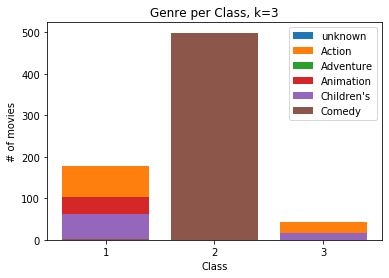

In [45]:
# Plot the number of movies in each class, color by genre
plt.bar(range(1,4), totals_df['unknown'])
plt.bar(range(1,4), totals_df['Action'])
plt.bar(range(1,4), totals_df['Animation'])
plt.bar(range(1,4), totals_df['Adventure'])
plt.bar(range(1,4), totals_df['Children\'s'])
plt.bar(range(1,4), totals_df['Comedy'])

plt.xticks(range(1,4))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=3')
plt.legend(['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy'])

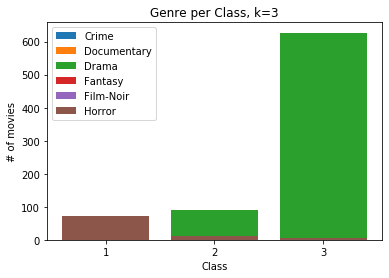

In [46]:
plt.bar(range(1,4), totals_df['Crime'])
plt.bar(range(1,4), totals_df['Documentary'])
plt.bar(range(1,4), totals_df['Drama'])
plt.bar(range(1,4), totals_df['Fantasy'])
plt.bar(range(1,4), totals_df['Film-Noir'])
plt.bar(range(1,4), totals_df['Horror'])

plt.xticks(range(1,4))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=3')
plt.legend(['Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror'])

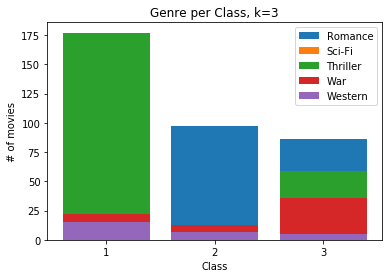

In [47]:
plt.bar(range(1,4), totals_df['Romance'])
plt.bar(range(1,4), totals_df['Sci-Fi'])
plt.bar(range(1,4), totals_df['Thriller'])
plt.bar(range(1,4), totals_df['War'])
plt.bar(range(1,4), totals_df['Western'])

plt.xticks(range(1,4))
plt.xlabel('Class')
plt.ylabel('# of movies')
plt.title('Genre per Class, k=3')
plt.legend(['Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

# Exploratory Data Analysis

Most of the movies fall into 5 categories, action, comedy, drama, romance, and thriller.  The drama genre was assigned to the greatest number of movies. 43% of the movies in this list fell into this genre.  The next highest genre was comedy, with 30% of movies.  This is also a common combination.  5% of movies were assigned to both the comedy and drama genres.  The unknown group was the smallest, with only 0.012% of the movies.  The smallest genre was fantasy.  This genre was assigned to 1.3% of movies.

# Clustering Analysis

**k = 3**

cluster 1 - Action, Animation, Children's, Horror, Thriller, War, Western

cluster 2 - Comedy, Drama, Horro, Romance, War, Western

cluster 3 - Action, Children's, Drama, Horror, Romance, Thriller, War, Western


**k = 8**

cluster 1 - Action, Animation, Comedy, Crime, Horror, Thriller, War, Western

cluster 2 - Comedy, Drama, Horror, Romance, War, Western

cluster 3 - Comedy, Horror, War, Western

cluster 4 - Action, Comedy, Drama, Horror, Thriller, War

cluster 5 - Children's, Comedy, Fantasy, Romance, Sci-Fi, Western

cluster 6 - Documentary, Drama, War

cluster 7 - Comedy, Drama, Fantasy, Romance, War

cluster 8 - Animation, Horror, Sci-Fi, Western


**k = 15**

cluster 1 - Animation, Action, Comedy, Horror, Crime, Thriller, War, Western

cluster 2 - Comedy, Drama, Horror, Romance, War, Western

cluster 3 - Comedy, Horror, War, Western

cluster 4 - Action, Comedy, Drama, Horror, Thriller, War

cluster 5 - Children's, Comedy, Fantasy, Romance, Sci-Fi, Western

cluster 6 - Documentary, Drama, War

cluster 7 - Comedy, Drama, Fantasy, Romance, War

cluster 8 - Animation, Horror, Sci-Fi, Western

cluster 9 - Comedy, Documentary, Drama, War

cluster 10 - Animation, Film-Noir, Western

cluster 11 - Action, Animation, Comedy, Crime, Sci-Fi, War

cluster 12 - Drama, Fantasy, Thriller, War

cluster 13 - Comedy, Drama, War

cluster 14 - Action, Animation, Drama, Romance, War

cluster 15 - Action, Animation Crime, Drama, Film-Noir, Romance, Sci-Fi


When using 15 clusters, I had expected the data to divide close to one genre per cluster.  This is not at all what happened.  In fact, using a larger number of clusters starts to make the clustering appear more random.  The genres divided amongst the clusters, rather than go into one cluster.  This shows that the combination of genres had more of an inpact on cluster selection than the individual genres did.  For example, comedies appear in 10 out of the 15 clusters.  They did not all go into one cluster, but rather divided amongst all of them.  Comedy does tend to be listed with other genres, which would explain why this happened.  Drama is another genre that is often listed with an additional genre, it can be found in 9 of the 15 clusters.

Using 8 clusters had a similar result as 15.  Distinct groups were formed based on the combinations of the genres beyond the information that can be gained from knowing a single genre.

The first 8 clusters with k=15 contain exactly the same genres as when k=8.  The remaining clusters when k=15 have pulled out movies that did not fit as well in the original 8 clusters.  This appears to make it more specific.  More nuanced differences are allowed to be found.

Using k=3 did not provide enough information to distinguish one cluster from another very well.  All three clusters have a very similar mix of genres.

# Conclusions

Although I was initially surprised about the way the model fromed the clusters, looking at the combinations of genres in each cluster clarified the reasoning.  Most movies belong to several genres.  The different movie types can be represented by these combinations.  For example, action, comedy, drama, horror, thriller, and war together represents a very different type of movie than action, animation, comedy, crime, sci-fi, and war.  Even though both of these are part of the action and comedy genre, they represent very different types of movies.  The classifier was able to pick out these differences and cluster similar movies together, even if there were common features between many others.

In this case, I would choose to use k=8.  By looking at the inertia graph, we can see that the information that is gained from additional clusters mostly levels off at this point.  Examining the combinations of genres in the clusters confirmed this.